## Image Search from text prompts (using CLIP model) with Gradio interface


In [11]:
#importing required libraries
import gradio as gr
import os
import clip
import torch

def find_similar_image(prompt):
    
    # Load the CLIP model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)
    
    # Load the images from the specified folder
    image_folder = r"C:\Users\katku\Downloads\New one\anju"
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = [preprocess(Image.open(img).convert("RGB")).unsqueeze(0).to(device) for img in image_paths]
    
    # Encode the prompt using CLIP
    text = clip.tokenize([prompt]).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text)
    
    # Calculate similarity scores between prompt and images
    with torch.no_grad():
        image_features = model.encode_image(torch.cat(images, dim=0))
        similarity_scores = (100.0 * text_features @ image_features.T).softmax(dim=-1)
    
    # Get index of the most similar image
    best_image_idx = similarity_scores.argmax().item()
    
    # Get path of the most similar image
    best_image_path = image_paths[best_image_idx]
    
    return Image.open(best_image_path)

# Define the Gradio interface
iface = gr.Interface(
    fn=find_similar_image, 
    inputs="text",
    outputs="image",  
    title="Image Search",
    description="Enter a text prompt to find the most visually similar image."
)
iface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


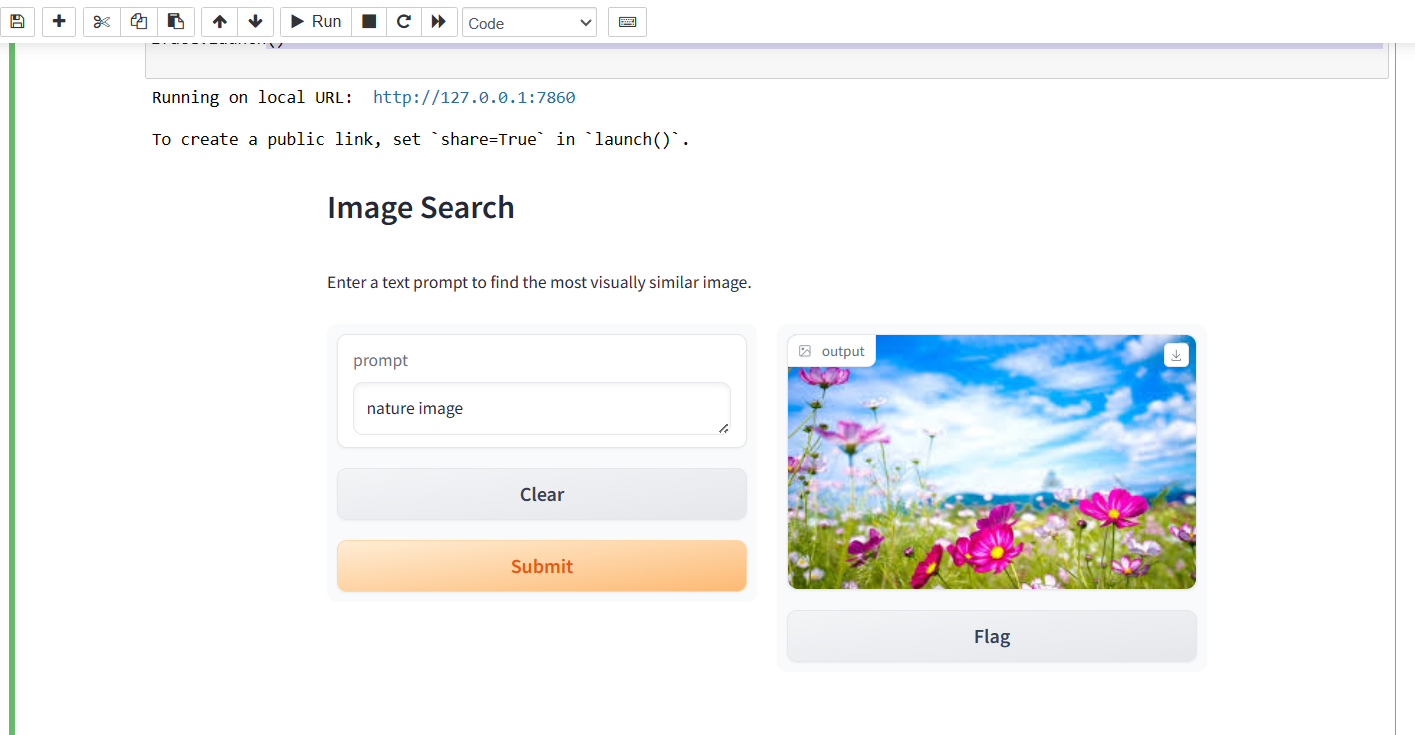

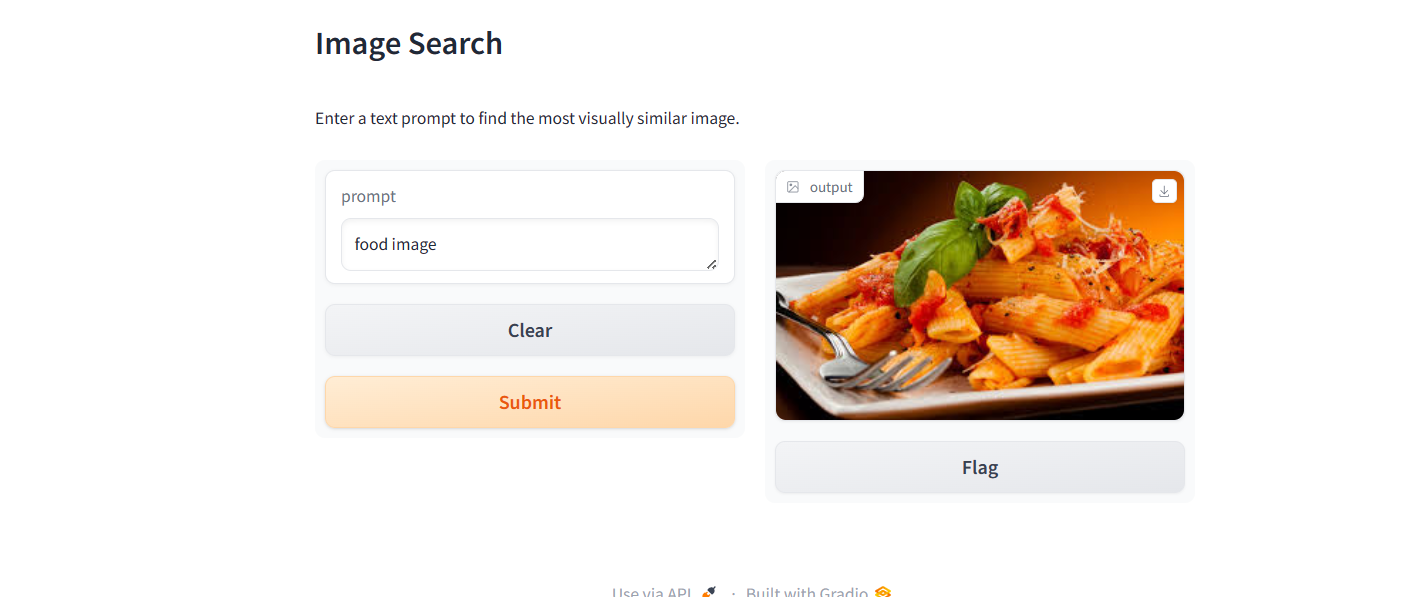

In [14]:
from IPython.display import Image, display

# Path to your image files
image_paths = [r"C:\Users\katku\OneDrive\Pictures\Screenshots\Screenshot 2024-04-22 221931.png",r"C:\Users\katku\OneDrive\Pictures\Screenshots\Screenshot 2024-04-22 222534.png"]
# Display each image
for path in image_paths:
    display(Image(filename=path))